In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.tsa.stattools import pacf as partial_acf

In [5]:
def plot_ma1_acf(mu, theta_1):
    acf = np.array([1]+[theta_1/(1+theta_1**2)]+[0]*28)
    fig = plt.figure(figsize = (8,4.5))
    plt.bar(x = range(len(acf)),height = acf)
    plt.xlabel('Лаг (h)')
    plt.ylabel('Автокорреляция')
    plt.title(r'Коррелограмма АКФ для процесса $Y_t = %.2f + \varepsilon_t + %.2f \varepsilon_{t-1} $' %(mu, theta_1))
    plt.show()

In [73]:
def plot_ma1_pacf(mu, theta_1, T, random_state):
    y = np.zeros(shape = (1000, T))
    y[:, 0] = mu
    epsilons = stats.norm.rvs(size = (1000, T), random_state = random_state)
    for t in range(1, T):
        y[:, t] = mu + epsilons[:, t] + theta_1*epsilons[:, t-1]
    pacf = np.mean(np.apply_along_axis(lambda x: partial_acf(x, nlags = 29), 1, y), axis = 0)
    pacf = np.where(np.abs(pacf)>0.02, pacf, 0)
    fig = plt.figure(figsize = (8,4.5))
    plt.bar(x = range(len(pacf)), height = pacf)
    plt.xlabel('Лаг (h)')
    plt.ylabel('Частичная автокорреляция')
    plt.title(r'Коррелограмма ЧАКФ для процесса $Y_t = %.2f + \varepsilon_t + %.2f \varepsilon_{t-1} $' %(mu, theta_1))
    plt.show()

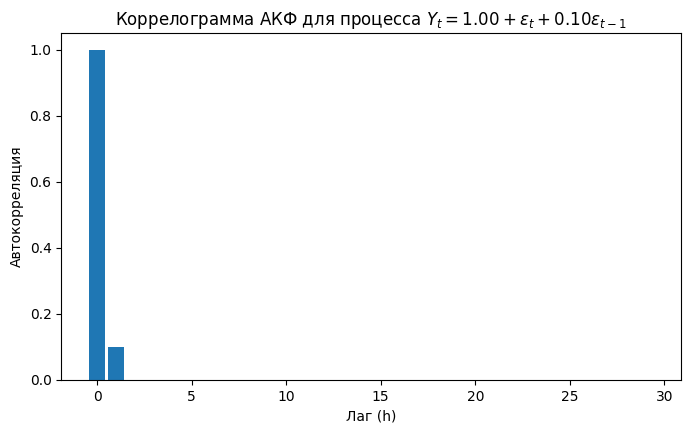

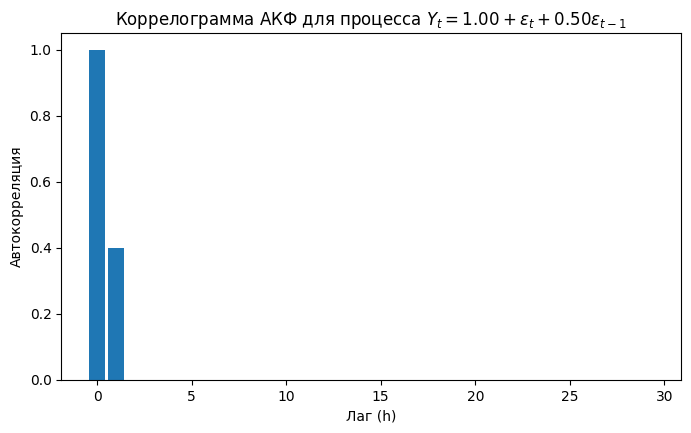

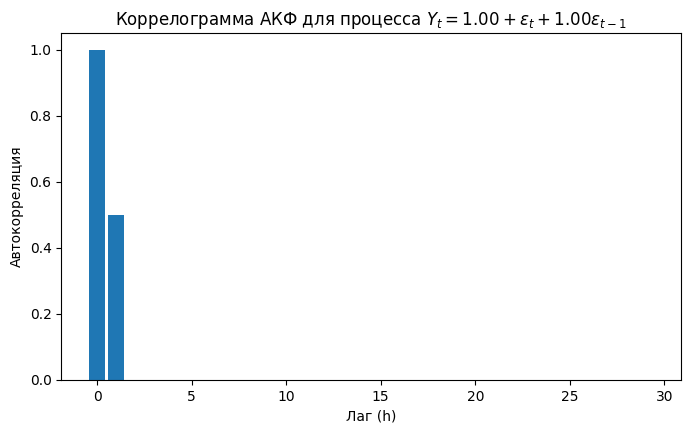

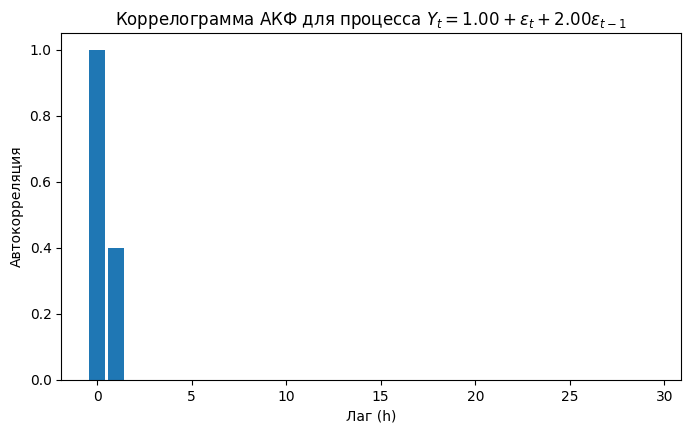

In [70]:
for theta_1 in [0.1, 0.5, 1, 2]:
    plot_ma1_acf(mu = 1, theta_1 = theta_1)

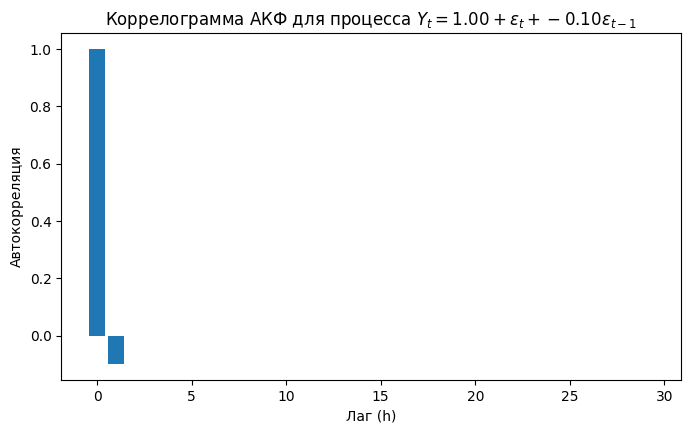

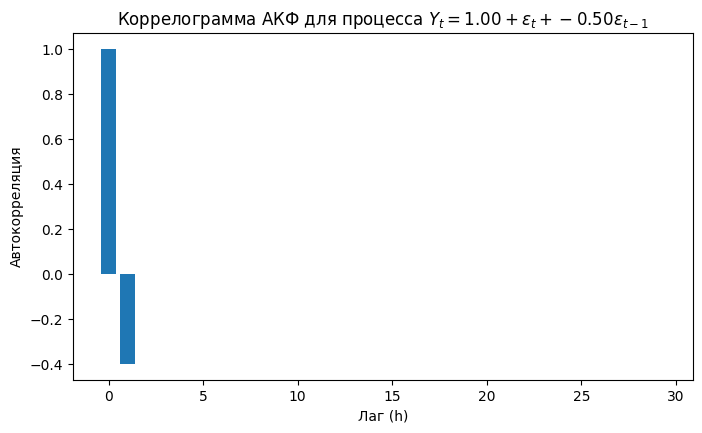

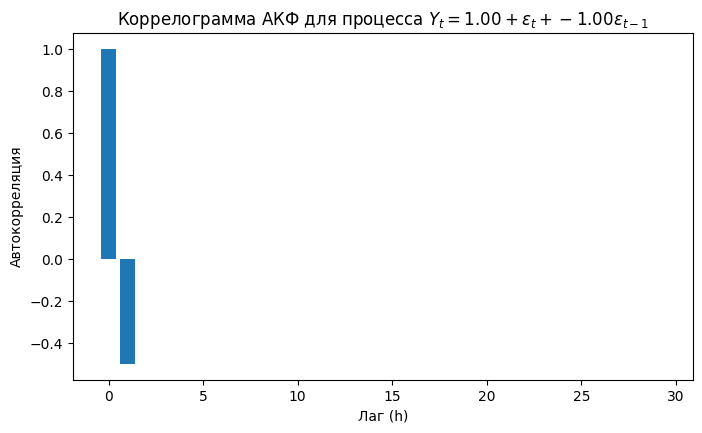

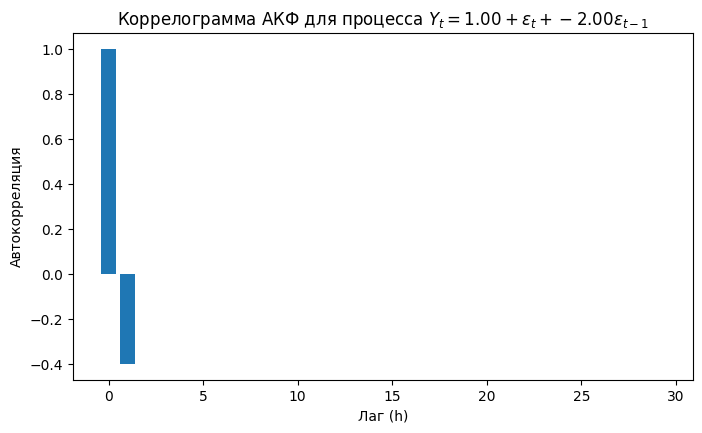

In [71]:
for theta_1 in [-0.1, -0.5, -1, -2]:
    plot_ma1_acf(mu = 1, theta_1 = theta_1)

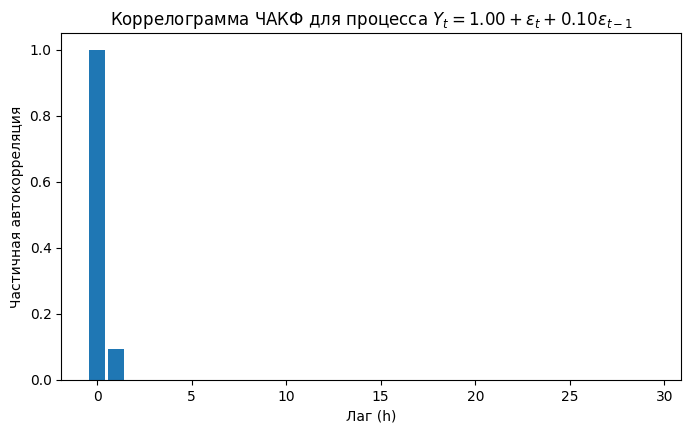

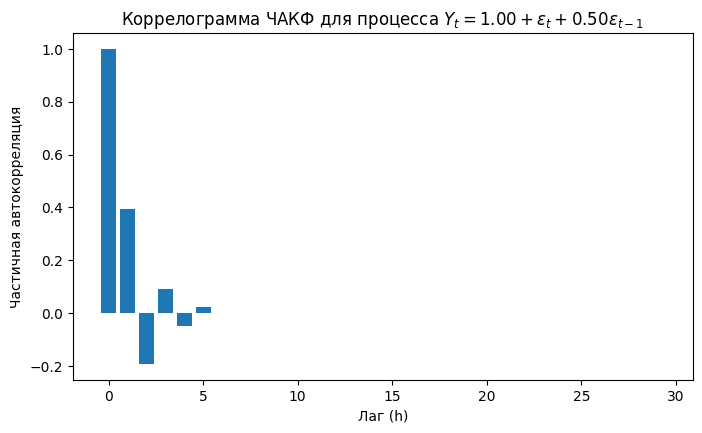

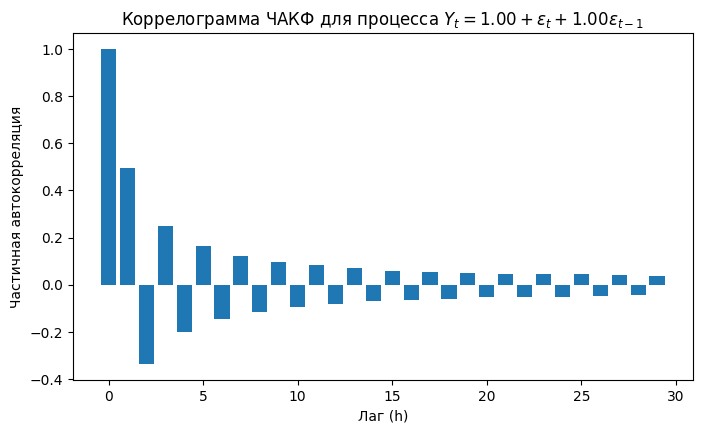

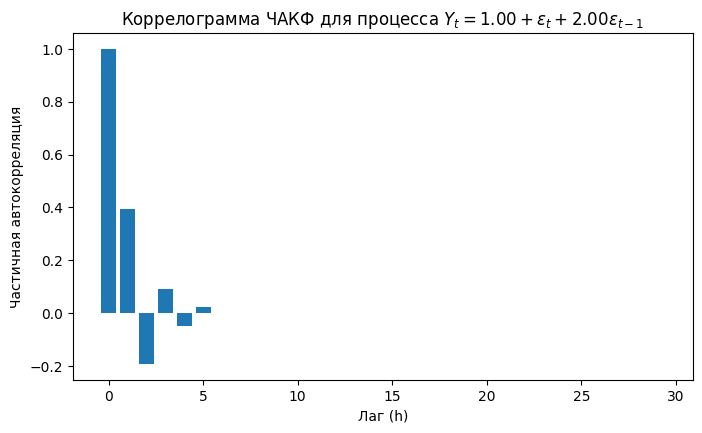

In [74]:
for theta_1 in [0.1, 0.5, 1, 2]:
    plot_ma1_pacf(mu = 1, theta_1 = theta_1, T = 500, random_state = 42)

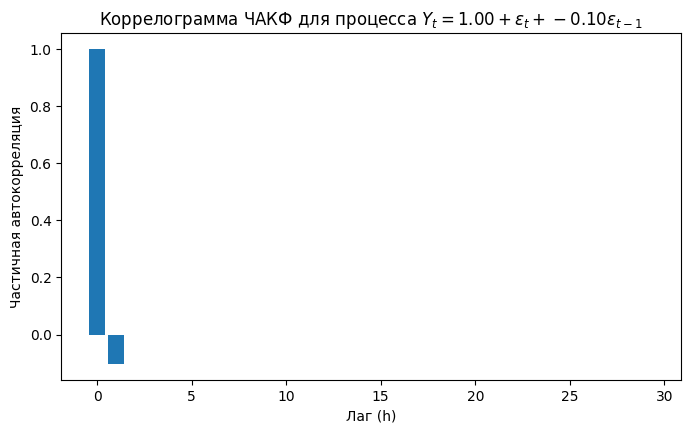

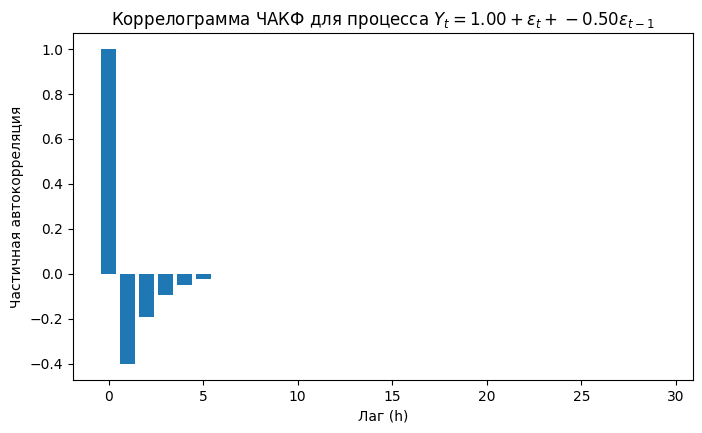

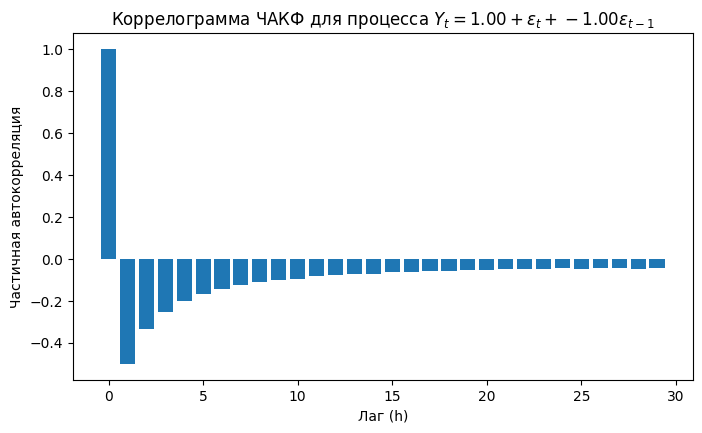

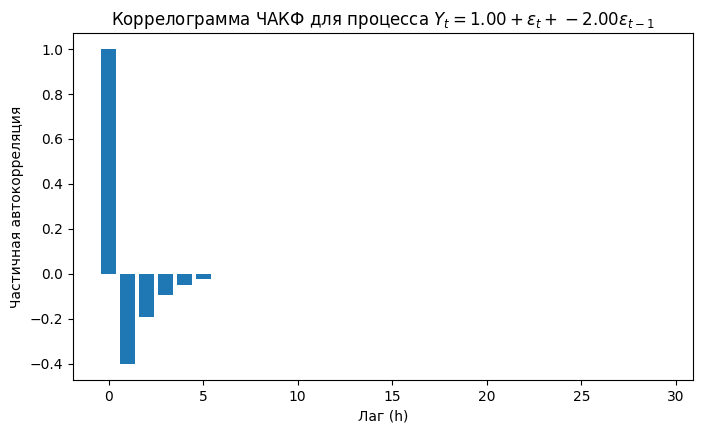

In [75]:
for theta_1 in [-0.1, -0.5, -1, -2]:
    plot_ma1_pacf(mu = 1, theta_1 = theta_1, T = 500, random_state = 42)

In [65]:
def simulate_ma1_with_shock(mu, theta_1, T, random_state, plot = True):    
    y = np.zeros(T)
    y[0] = mu
    epsilons = stats.norm.rvs(size = T, random_state = random_state)
    epsilons[int(T/2)] = 10
    for t in range(1, T):
        y[t] = mu + epsilons[t] + theta_1*epsilons[t-1]
    if plot:
        fig = plt.figure(figsize = (8,4.5))
        plt.plot(y)
        plt.xlabel('Период')
        plt.ylabel('Значение')
        plt.title(r'Cимуляция процесса $Y_t = %.2f + \varepsilon_t + %.2f \varepsilon_{t-1} $' %(mu, theta_1))
        plt.hlines(y = y[0], xmin =0, xmax = T, color = 'r', linestyles = '--')
        #plt.text(x = T*0.95, y = y[0]*1.1, s = r'$\frac{%.2f}{1-%.2f}$' %(phi_0, phi_1), color = 'r')
        plt.show()
    else:
        return y

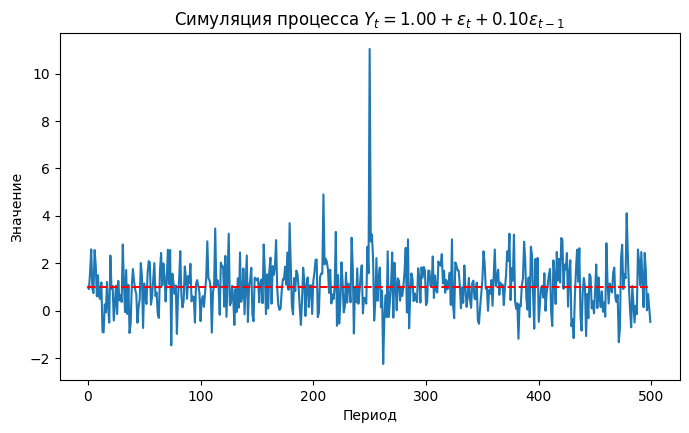

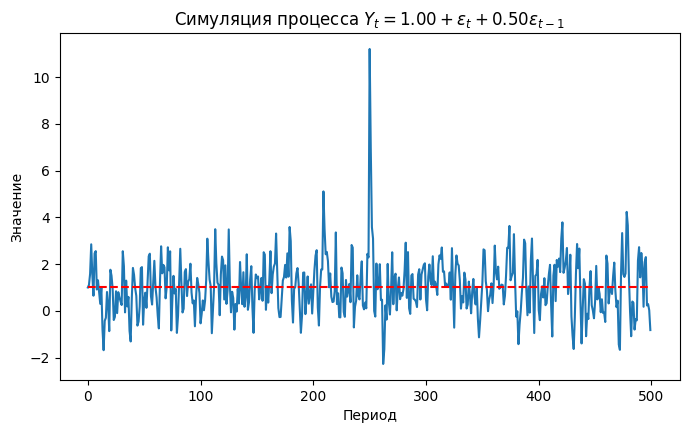

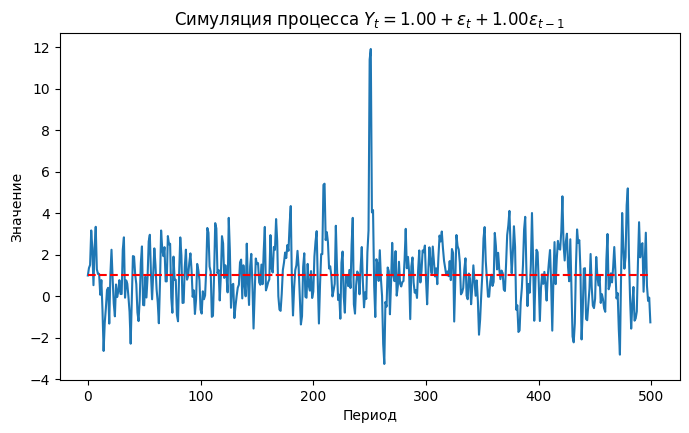

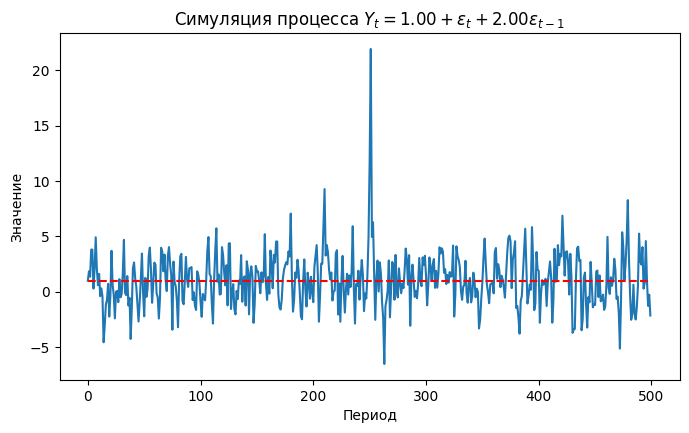

In [67]:
for theta_1 in [0.1, 0.5, 1, 2]:
    simulate_ma1_with_shock(mu = 1, theta_1 = theta_1, T = 500, random_state = 42)

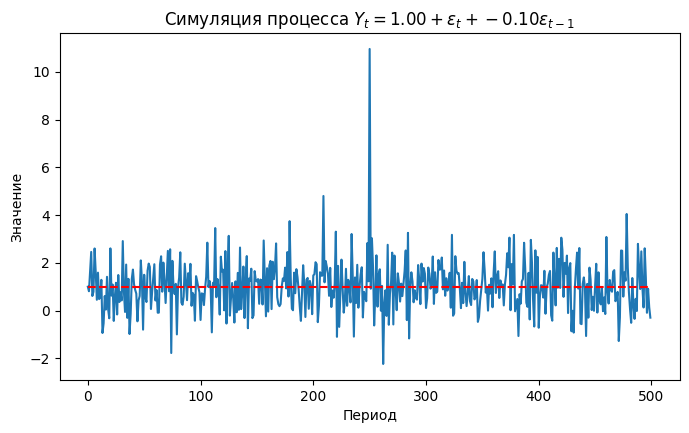

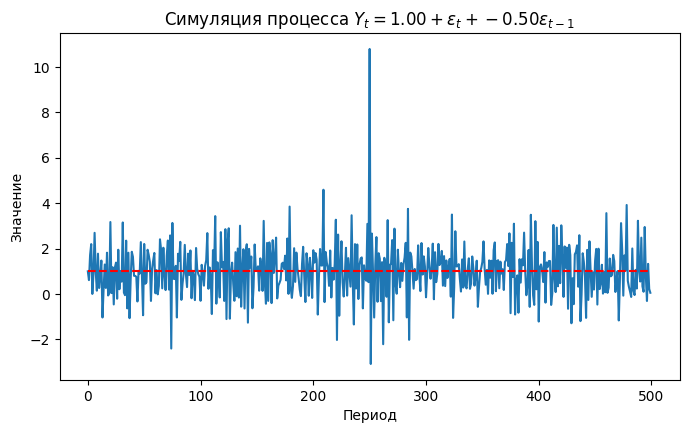

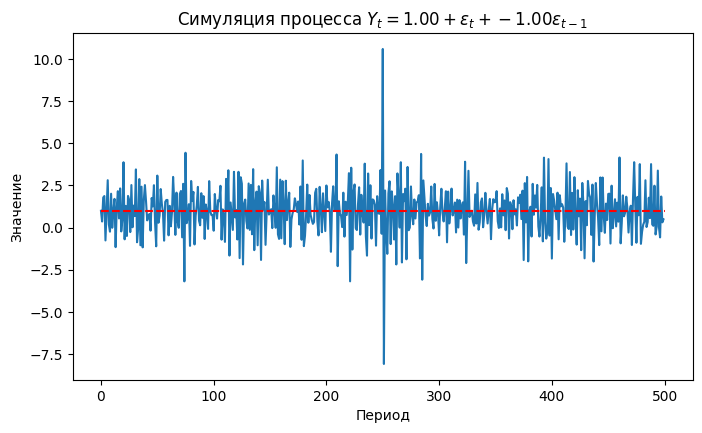

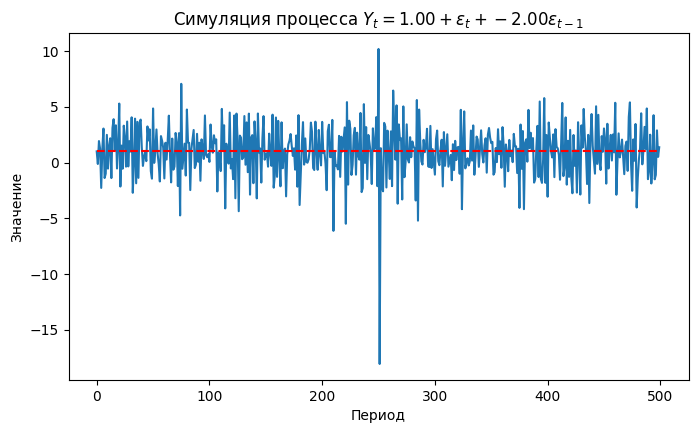

In [68]:
for theta_1 in [-0.1, -0.5, -1, -2]:
    simulate_ma1_with_shock(mu = 1, theta_1 = theta_1, T = 500, random_state = 42)